KMeans for customer segmentation with the data provided from reported.csv file. Since the dataset is related to crimes over years, the approach to segment years based on crime statistics. This could help identify patterns or changes in crime rates over time, which is a fascinating analysis in its own right.

Step 1: Load and explore reported.csv dataset: First Load the dataset and get a basic understanding of its structure.

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('reported.csv')

# Display the first few rows - exploring what kind of data is there, or what data isn't
print(data.head())


   Year  crimes.total  crimes.penal.code  crimes.person  murder  assault  \
0  1950          2784               2306            120       1      105   
1  1951          3284               2754            125       1      109   
2  1952          3160               2608            119       1      104   
3  1953          2909               2689            119       1      105   
4  1954          3028               2791            126       1      107   

   sexual.offenses  rape  stealing.general  burglary  ...  vehicle.theft  \
0               40     5              1578       295  ...            NaN   
1               45     6              1899       342  ...            NaN   
2               39     4              1846       372  ...            NaN   
3               45     5              1929       361  ...            NaN   
4               41     5              1981       393  ...            NaN   

   out.of.vehicle.theft  shop.theft  robbery  fraud  criminal.damage  \
0             

C:\Users\jeffo\AppData\Local\Temp\ipykernel_11504\3480352266.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Step 2: preprocess the data: preprocessing might involve handling missing values and normalizing the data. since clustering algorithms like KMeans are sensitive to the scale of the data, normalization is crucial.

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset
file_path = 'reported.csv'  
data = pd.read_csv(file_path)

# Replace missing values with 0
imputer = SimpleImputer(strategy='constant', fill_value=0)
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Normalize the data, excluding the 'Year' column
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_imputed.drop(['Year'], axis=1))

# Add 'Year' back for reference
scaled_data = pd.DataFrame(scaled_features, columns=data_imputed.columns[1:])
scaled_data['Year'] = data_imputed['Year']

# Display the first few rows of the scaled data
print(scaled_data.head())


   crimes.total  crimes.penal.code  crimes.person    murder   assault  \
0     -1.741568          -1.797285      -1.131458 -1.053624 -1.137329   
1     -1.622287          -1.671262      -1.114381 -1.053624 -1.123028   
2     -1.651869          -1.712332      -1.134873 -1.053624 -1.140904   
3     -1.711748          -1.689546      -1.134873 -1.053624 -1.137329   
4     -1.683359          -1.660854      -1.110966 -1.053624 -1.130178   

   sexual.offenses      rape  stealing.general  burglary  house.theft  ...  \
0        -0.739333 -0.791785         -1.930388 -2.086553    -1.662178  ...   
1        -0.634665 -0.739159         -1.775573 -1.982853    -1.662178  ...   
2        -0.760266 -0.844411         -1.801135 -1.916661    -1.662178  ...   
3        -0.634665 -0.791785         -1.761105 -1.940931    -1.662178  ...   
4        -0.718399 -0.791785         -1.736025 -1.870326    -1.662178  ...   

   out.of.vehicle.theft  shop.theft   robbery     fraud  criminal.damage  \
0             -1

Step 3: Apply Clustering Algorithms - using KMeans to cluster the data. The Elbow Method helps determine the optimal number of clusters.

C:\Users\jeffo\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\jeffo\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


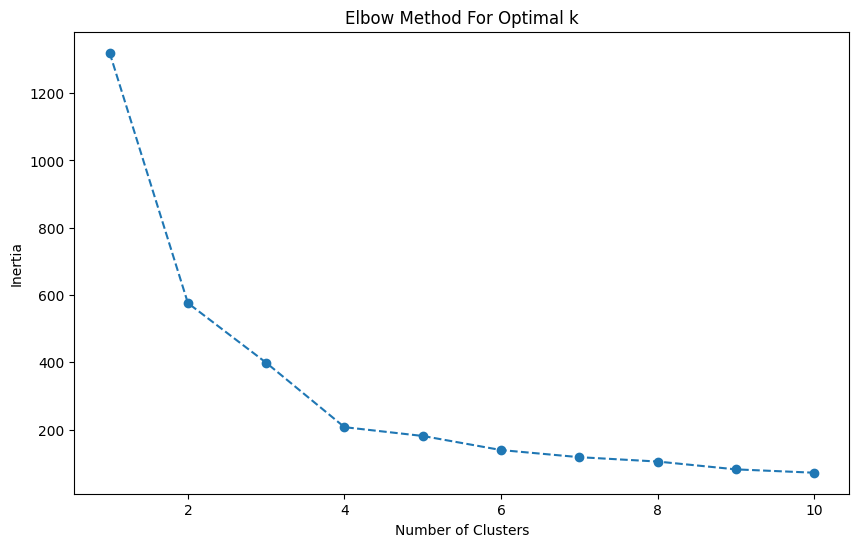

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


Choose the number of clusters where the inertia starts to decrease more slowly, indicating the elbow point.

To determine the optimal number of clusters, looking for a point on the graph where the decrease in inertia begins to slow down, indicating that adding more clusters doesn't siginificantly improve the fit of the model. This point is known as the "elbow". 

Im my graph, the inertia drops rapidly as we move from 1 to 2 clusters and continues to drop but at a slower rate as we increase the number of clusters to 3 and 4. after 4 clusters , the line starts to straighten out, and additional clusters do not reduce the inertia by a substandtial amount.

Explaintion: the "elbow" is typically where the curve startes to flatten, which in my graph appears to be around the point where the number of clusters is 3. It suggests that increasing the number of clusters beyond 3 does not provide as much benefit in reducing the inertia. Therefore, in this case the optimal number of clusters to choose could be 3 based on this graph. however it's also reasonable to test both 3 and 4 clusters in practice to see which number provides more meaningful and interpretable segments.

Exploring the dataset with both 3 and 4 clusters, apply the KMeans clustering algorithm to the dataset with each number of clusters. 

Mean values for 3 clusters:
             Year  crimes.total  crimes.penal.code  crimes.person    murder  \
Cluster_3                                                                     
0          1975.0   9209.476190        7800.857143     279.904762  1.619048   
1          2000.5  13888.766667       11992.566667     732.833333  2.233333   
2          1957.0   3699.933333        3352.466667     128.133333  1.000000   

              assault  sexual.offenses       rape  stealing.general  \
Cluster_3                                                             
0          259.380952        40.238095   9.285714       5502.904762   
1          692.866667       115.166667  34.666667       7192.433333   
2          112.800000        44.733333   5.866667       2465.466667   

              burglary  ...  shop.theft    robbery       fraud  \
Cluster_3               ...                                      
0          1510.666667  ...  363.285714  29.761905  791.238095   
1          1376.966667

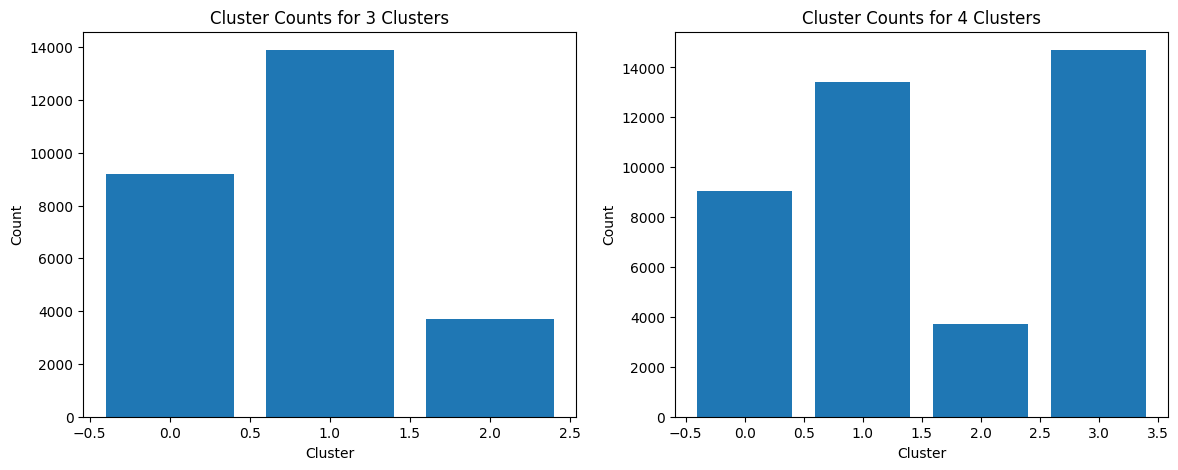

Silhouette score for 3 clusters: 0.41688391646791007
Silhouette score for 4 clusters: 0.489325918016101


In [6]:
from sklearn.cluster import KMeans
# testing KMeans with both 3 and 4 clusters

# Apply KMeans with 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_3.fit(scaled_features)
data['Cluster_3'] = kmeans_3.labels_

# Apply KMeans with 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=42)
kmeans_4.fit(scaled_features)
data['Cluster_4'] = kmeans_4.labels_

# Observing the mean values of the original features within each cluster
mean_values_3_clusters = data.groupby('Cluster_3').mean()
mean_values_4_clusters = data.groupby('Cluster_4').mean()

print("Mean values for 3 clusters:")
print(mean_values_3_clusters)
print("\nMean values for 4 clusters:")
print(mean_values_4_clusters)

# For a more visual comparison, using plot the size of each cluster
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plotting the number of entries in each cluster for 3 clusters
axes[0].bar(mean_values_3_clusters.index, mean_values_3_clusters['crimes.total'])
axes[0].set_title('Cluster Counts for 3 Clusters')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Count')

# Plotting the number of entries in each cluster for 4 clusters
axes[1].bar(mean_values_4_clusters.index, mean_values_4_clusters['crimes.total'])
axes[1].set_title('Cluster Counts for 4 Clusters')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')

plt.show()

# To assess the quality of the clusters, you can use silhouette score
from sklearn.metrics import silhouette_score

score_3_clusters = silhouette_score(scaled_features, data['Cluster_3'])
score_4_clusters = silhouette_score(scaled_features, data['Cluster_4'])

print(f"Silhouette score for 3 clusters: {score_3_clusters}")
print(f"Silhouette score for 4 clusters: {score_4_clusters}")


The code above will cluster the data into both 3 and 4 clusters and then provide with the mean values of each cluster for comparison. additionally, it calculates the silhouette score for both clustering solutions, which is a measure of how similar an object is to its own cluster compared to other clusters. A higher silhouette score indicates better-defined clusters. the  bar plots will help visualize the size and distribution of the clusters for both solutions.

Step 4: Perform KMeans Clustering: - after identifying the optimal number of cluster, perform KMeans clustering with that number. 

In [4]:
# Assuming the elbow method suggests 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_features)

# Add the cluster labels to the DataFrame
data['Cluster'] = kmeans.labels_

# Explore the clusters
print(data.groupby('Cluster').mean())


           Year  crimes.total  crimes.penal.code  crimes.person  murder  \
Cluster                                                                   
0        1974.5   9060.200000        7655.350000     273.350000     1.6   
1        1995.0  13423.190476       11825.333333     613.809524     2.0   
2        1957.0   3699.933333        3352.466667     128.133333     1.0   
3        2010.5  14697.100000       12215.600000     950.600000     2.7   

            assault  sexual.offenses       rape  stealing.general  \
Cluster                                                             
0        253.200000        39.800000   9.150000       5407.400000   
1        581.714286        85.238095  20.952381       7851.142857   
2        112.800000        44.733333   5.866667       2465.466667   
3        895.300000       171.400000  61.200000       5831.200000   

            burglary  ...  vehicle.theft  out.of.vehicle.theft  shop.theft  \
Cluster               ...                               

Step 5: Interpret the Clusters - looking at the average of the features within each cluster to understand the characteristics that define each segment. this can provide insights into patterns or shifts in crime rates over the years.

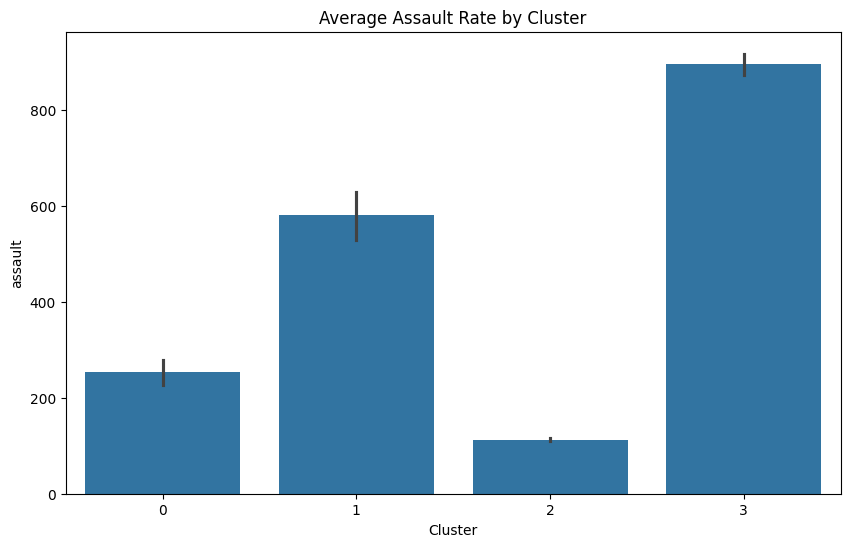

In [5]:
# Visualize the differences between clusters
import seaborn as sns

# Visualize the average 'assault' rate by cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='assault', data=data)
plt.title('Average Assault Rate by Cluster')
plt.show()
